# Iris Dataset Exploratory Data Analysis

## Analyzing Data

#### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
print("Libraries are imported!")

Libraries are imported!


#### Load the data using read_csv method which is avaliable in pandas.

In [2]:
data = pd.read_csv("Iris.csv")
print("Data loaded")

Data loaded


#### Take a look at the data by using head() and tail()

In [3]:
print(data.head()) #first 5 rows
print("-----------------------------------------------------------------------------")
print(data.tail()) # last five rows

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
-----------------------------------------------------------------------------
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virgini

#### We need more information about our data in order to draw plots etc.
- Exploring data one by one.

In [4]:
print("data consists of {} (rows and columns)" .format(data.shape))

data consists of (150, 6) (rows and columns)


In [5]:
data.columns # aka features

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.dtypes # data types

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
data.info() # if you want to see much more in one line code.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### As you might have noticed, species column contains 'Iris-' in the beginning.
- By removing it, we can make the names shorter.

In [8]:
data.drop(['Id'], axis = 1, inplace = True) # we wont use id in our data
data['Species'].head(-5)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
140    Iris-virginica
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
Name: Species, Length: 145, dtype: object

In [9]:
data.Species.value_counts() # let's remove "Iris-"

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
data.Species = data.Species.str.replace('Iris-', '')
data.Species.head(-5)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
Name: Species, Length: 145, dtype: object

#### Let's be more statistical

In [11]:
species = data.groupby(data['Species'])
species.describe()
# not easy to read?

SepalLengthCm                                              \
                   count   mean       std  min    25%  50%  75%  max   
Species                                                                
setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           SepalWidthCm         ... PetalLengthCm      PetalWidthCm         \
                  count   mean  ...           75%  max        count   mean   
Species                         ...                                          
setosa             50.0  3.418  ...         1.575  1.9         50.0  0.244   
versicolor         50.0  2.770  ...         4.600  5.1         50.0  1.326   
virginica          50.0  2.974  ...         5.875  6.9         50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [12]:
features = data.iloc[:,0:5]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
features_table = features.describe()
features_table.rename({'50%': 'median'}, inplace = True)
# inplace = True statements overwrites the current dataframe that we are working on.
features_table

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.groupby('Species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('Species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                    mean median         mean median          mean median   
Species                                                                    
setosa             5.006    5.0        3.418    3.4         1.464   1.50   
versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
virginica          6.588    6.5        2.974    3.0         5.552   5.55   

           PetalWidthCm         
                   mean median  
Species                         
setosa            0.244    0.2  
versicolor        1.326    1.3  
virginica         2.026    2.0

## Visualization of the Data

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Successful')

Successful


In [16]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


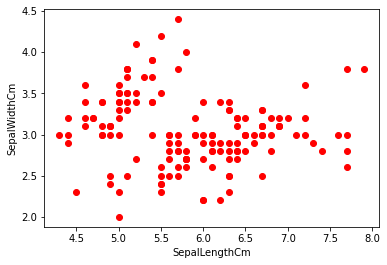

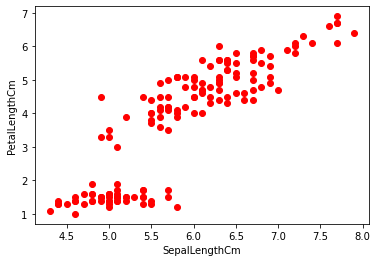

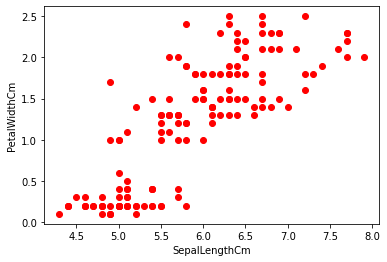

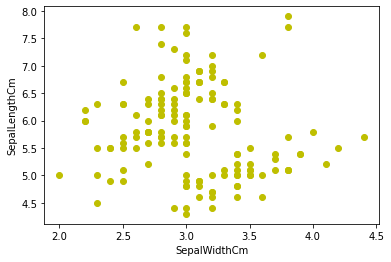

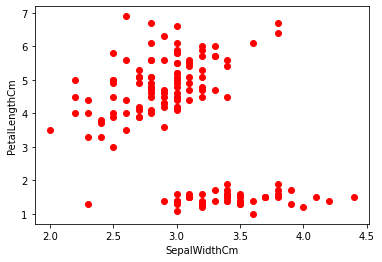

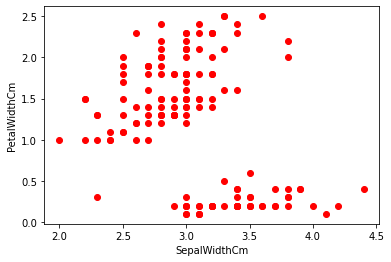

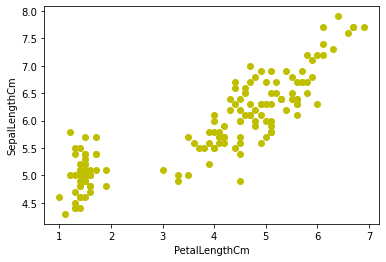

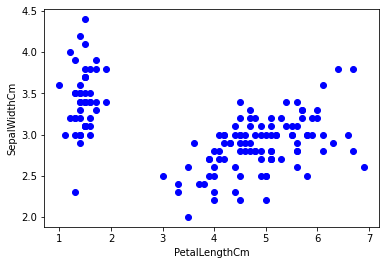

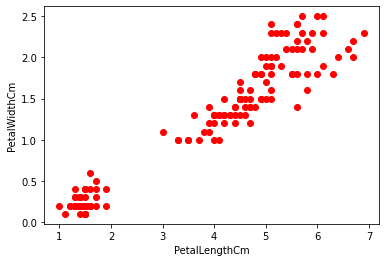

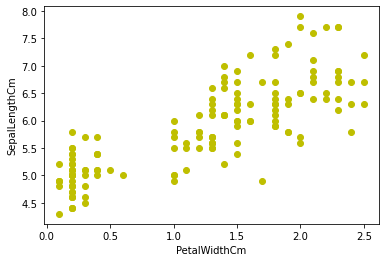

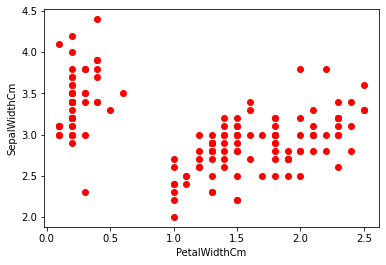

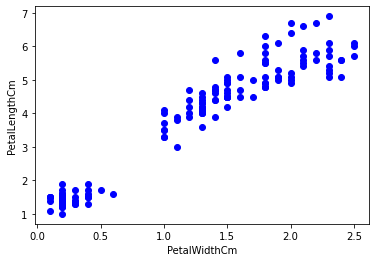

In [17]:
from random import randrange
colors = ['b', 'r', 'g', 'y']
for x in data.columns:
    if x == "Species":
        break
    for y in data.columns:
        if y == 'Species' or y == x:
            continue
        plt.figure(x)
        plt.scatter(data[x],data[y], color = colors[randrange(4)])
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

ValueError: could not convert string to float: 'setosa'

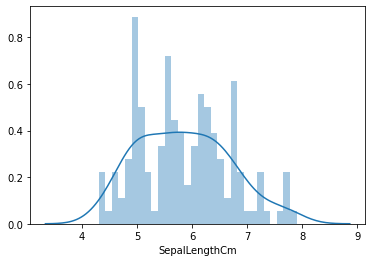

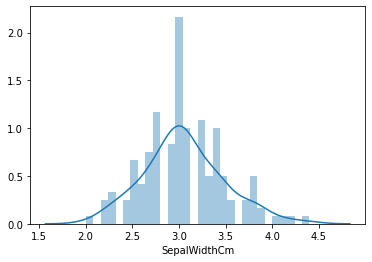

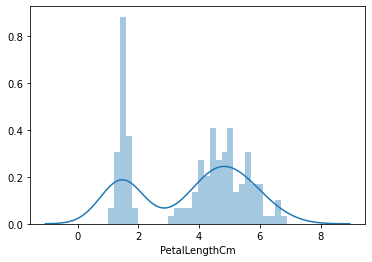

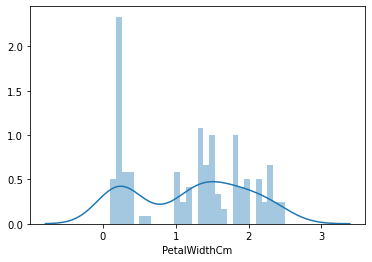

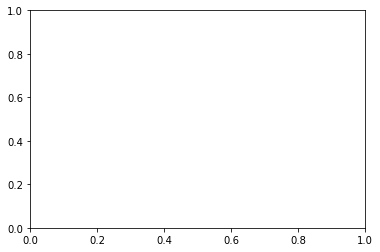

In [18]:
#check error message
import seaborn as sns
for each in data:
    plt.figure(each)
    sns.distplot(data[each], bins = 30)

#### ValueError: could not convert string to float: 'setosa', hmm it seems like we don't want strings when we are plotting

In [19]:
data['Species'] = [1 if each == 'setosa' else 2 if each == 'versicolor' else 3 for each in data['Species']]

In [20]:
data.iloc[np.random.choice(np.arange(len(data)), 10, False)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,7.4,2.8,6.1,1.9,3
8,4.4,2.9,1.4,0.2,1
55,5.7,2.8,4.5,1.3,2
111,6.4,2.7,5.3,1.9,3
64,5.6,2.9,3.6,1.3,2
91,6.1,3.0,4.6,1.4,2
149,5.9,3.0,5.1,1.8,3
108,6.7,2.5,5.8,1.8,3
50,7.0,3.2,4.7,1.4,2
27,5.2,3.5,1.5,0.2,1


#### Let's try it again..

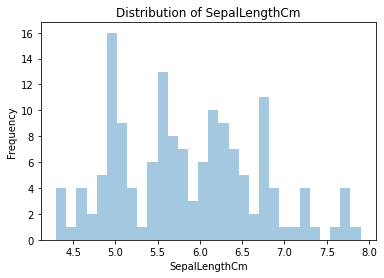

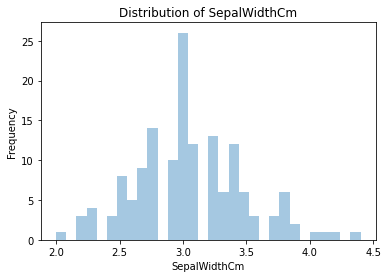

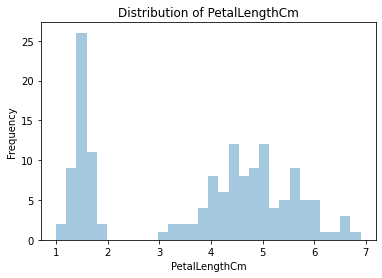

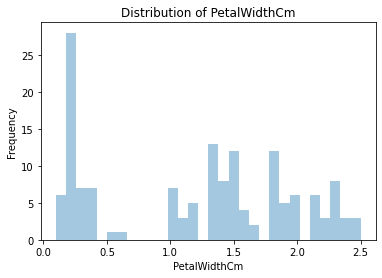

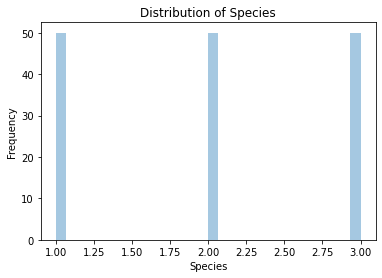

In [21]:
for each in data:
    plt.figure(each)
    sns.distplot(data[each], bins = 30, kde = False) #kde flag = false, only hist will be drawn.
    plt.ylabel('Frequency')
    plt.title("Distribution of {}" .format(each))

#### Histogram of features

In [22]:
type(features)

pandas.core.frame.DataFrame

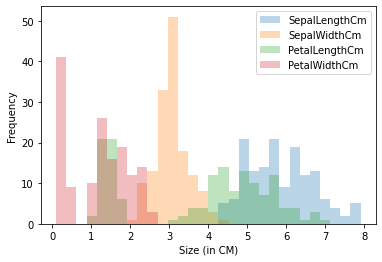

In [23]:
g = features.plot.hist(bins = 30, alpha = 0.3)
g.set_xlabel('Size (in CM)')
plt.show()

#### Boxplot and see outliers (if exists)

Text(0.5, 0, 'Size')

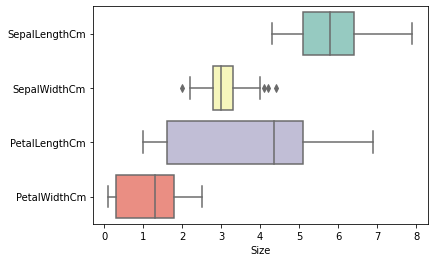

In [31]:
ax = sns.boxplot(data=features, orient="h", palette="Set3")
ax.set_xlabel('Size')

#### Examine the correlation between each of the measurements

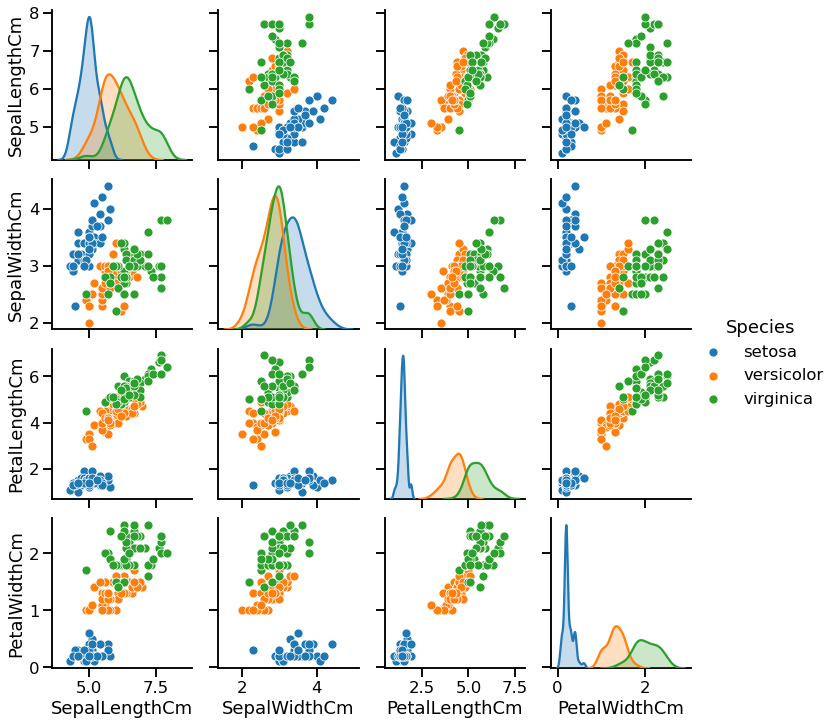

In [35]:
sns.pairplot(features, hue='Species');